In [1]:
import numpy as np
import os
import netCDF4 as nc
import glob
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shapereader
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from netCDF4 import Dataset
import matplotlib as mpl

In [2]:
path = "/data/disang/WRF/geomo/"

filelist = glob.glob(os.path.join(path,'sev_nearest.nc'))

for file in filelist:
    filename = os.path.basename(file)
    # time = datetime.datetime.strptime(filename.split('d02_')[1],'%Y-%m-%d_%H:%M:%S')
    # orbit = filename.split('-')[3][0:6]
    


    with Dataset(file, mode='r') as ncfile:

        # Extract the pressure, geopotential height, and wind variables
        # lats  = ncfile["XLAT"][0,:,:]
        # lons  = ncfile["XLONG"][0,:,:]
        d1 =ncfile["FR"][:,:]
        # d2 =ncfile["EROD_DRI"][0,1,:,:]
        # b1 = np.interp(d1, (d1.min(), d1.max()), (0, 0.4795))
        
        
filelist = glob.glob(os.path.join(path,'tro_nearest.nc'))

for file in filelist:
    filename = os.path.basename(file)
    # time = datetime.datetime.strptime(filename.split('d02_')[1],'%Y-%m-%d_%H:%M:%S')
    # orbit = filename.split('-')[3][0:6]
    


    with Dataset(file, mode='r') as ncfile:

        # Extract the pressure, geopotential height, and wind variables
        # lats  = ncfile["XLAT"][0,:,:]
        # lons  = ncfile["XLONG"][0,:,:]
        dtro =ncfile["FR"][:,:]
        # d2 =ncfile["EROD_DRI"][0,1,:,:]
        # b1 = np.interp(d1, (d1.min(), d1.max()), (0, 0.4795))
        

filelist = glob.glob(os.path.join('/data/disang/WRF/geomo/or/','geo_em.d01.nc'))



for file in filelist:
    filename = os.path.basename(file)
    # time = datetime.datetime.strptime(filename.split('d02_')[1],'%Y-%m-%d_%H:%M:%S')
    # orbit = filename.split('-')[3][0:6]
    


    with Dataset(file, mode='r') as ncfile1:

        # Extract the pressure, geopotential height, and wind variables
        lats  = ncfile1["XLAT_M"][0,:,:]
        lons  = ncfile1["XLONG_M"][0,:,:]
        # d0 =ncfile1["LANDMASK"][0,:,:]
        
        l0 =ncfile1["LANDMASK"][0,:,:]
        ###water
        n0 = ncfile1["LANDUSEF"][0,20,:,:] 
        ###barren
        q0 = ncfile1["LANDUSEF"][0,15,:,:] 
#         ###snow and ice
#         w0 = ncfile1["LANDUSEF"][0,14,:,:]  

        p0 = ncfile1["LU_INDEX"][0,:,:]

        sand = ncfile1["SANDFRAC"][0,:,:]
        clay = ncfile1["CLAYFRAC"][0,:,:]

        e1 =ncfile1["EROD"][0,0,:,:]
        e2 =ncfile1["EROD"][0,1,:,:]
        e3 =ncfile1["EROD"][0,2,:,:]
#         m1 = 1.5*np.max(e1)
#         m2 = 1.5*np.max(e2)
#         m3 = 1.5*np.max(e3)
        m1 = np.max(e1)
        m2 = np.max(e2)
        m3 = np.max(e3)
        
        # sf[np.nonzero(d1)]=0.920
        # cf[np.nonzero(d1)]=0.250
        
        b1 = np.interp(d1, (d1.min(), d1.max()), (0, m1))
        b2 = np.interp(d1, (d1.min(), d1.max()), (0, m2))
        b3 = np.interp(d1, (d1.min(), d1.max()), (0, m3))
        
        tb1 = np.interp(d1, (d1.min(), dtro.max()), (0, 0.5))
        tb2 = np.interp(d1, (d1.min(), dtro.max()), (0, 0.25))
        tb3 = np.interp(d1, (d1.min(), dtro.max()), (0, 0.25))
        
        
        
        #### sand water missing filtering and creat aral sea mask (delta5)
        delta5 = b1.copy()
#         delta5[np.nonzero(sand)]=np.nan
        delta5[b1 ==0]=np.nan
        
        delta5[lons < 56.59] = np.nan
        delta5[lats < 41.3] = np.nan
        delta5[lons > 64] = np.nan
        delta5[lats > 47.5] = np.nan
        
        sand2 =sand.copy()
        clay2 =clay.copy() 
        
        sand2[delta5 >0]=0.65
        clay2[delta5 >0]=0.31
        
        ###landmask modify
        l1 = l0.copy()
        l1[delta5 >0]=1
        

#         n1 =n0.copy()
        
#         n1[delta5 >0]=0
        
        #### mask for lu barren, n0 water layer,q0 barren layer, w0 snow ice
        n1= n0.copy()
        
        ####land-water difference
        msk1 =n0.copy()
        msk1[msk1==0]=np.nan   
        msk1[l1==0]=np.nan
        n1[l1 == 1]=0
        

        
#         # ### layer data change for snow ice , water and  barren
#         w1 =w0.copy()
#         w1[np.nonzero(w1)] = 0
        
        ###change land-water difference and snow to barren
        q1 =q0.copy()
        q1[msk1>0]=17.0
#         q1[w0==1]=1
        
        ### lu index change
        ###snow ice remove and water to barren
        p1= p0.copy()
        p1[msk1 >0] = 16.0
        
        
#         mk1 = e1.copy()
#         mk1[b1 == 0]=np.nan

#         mm1 = b1.copy()

#         mm1[mk1>0]=np.nan
#         mm1[mm1==0]=np.nan
        
        
     
filelist = glob.glob(os.path.join('/data/disang/WRF/Build_WRF/WPS/','geo_em.d01.nc'))
        
for file in filelist:
    filename = os.path.basename(file)
    # time = datetime.datetime.strptime(filename.split('d02_')[1],'%Y-%m-%d_%H:%M:%S')
    # orbit = filename.split('-')[3][0:6]
    


    with Dataset(file, mode='r+') as ncfile2:

        ncfile2["LANDMASK"][0,:,:] = l1
        ###water
        ncfile2["LANDUSEF"][0,20,:,:] =n1
        ###barren
        ncfile2["LANDUSEF"][0,15,:,:] =q1
#         ###snow and ice
#         ncfile2["LANDUSEF"][0,14,:,:]=w1


        ncfile2["LU_INDEX"][0,:,:]=p1

        ncfile2["SANDFRAC"][0,:,:]=sand2
        ncfile2["CLAYFRAC"][0,:,:]=clay2
        ncfile2["EROD"][0,0,:,:]=tb1
        ncfile2["EROD"][0,1,:,:]=tb2
        ncfile2["EROD"][0,2,:,:]=tb3
#         ncfile2["LAI12M"][0,2,:,:]=la
#         ncfile2["LAI12M"][0,3,:,:]=la
#         ncfile2["LAI12M"][0,4,:,:]=la
#         ncfile2["LAI12M"][0,5,:,:]=la
#         ncfile2["LAI12M"][0,6,:,:]=la
#         ncfile2["LAI12M"][0,7,:,:]=la
    

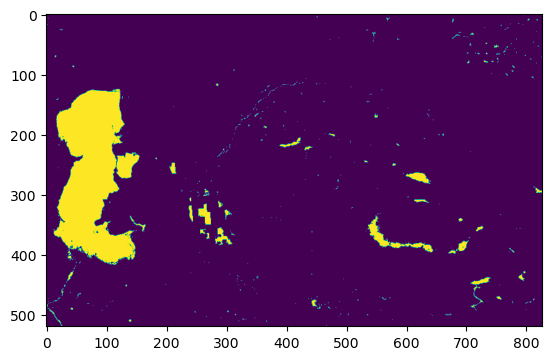

In [3]:
plt.imshow(n1)

In [12]:
mk1 = e1.copy()
mk1[b1 == 0]=np.nan

mm1 = b1.copy()

mm1[mk1>0]=np.nan
mm1[mm1==0]=np.nan


a1 = np.where(mm1>0,mm1,mk1)

mk1 = e2.copy()
mk1[b1 == 0]=np.nan

mm1 = b2.copy()

mm1[mk1>0]=np.nan
mm1[mm1==0]=np.nan


a2 = np.where(mm1>0,mm1,mk1)

mk1 = e3.copy()
mk1[b1 == 0]=np.nan

mm1 = b3.copy()

mm1[mk1>0]=np.nan
mm1[mm1==0]=np.nan


a3 = np.where(mm1>0,mm1,mk1)

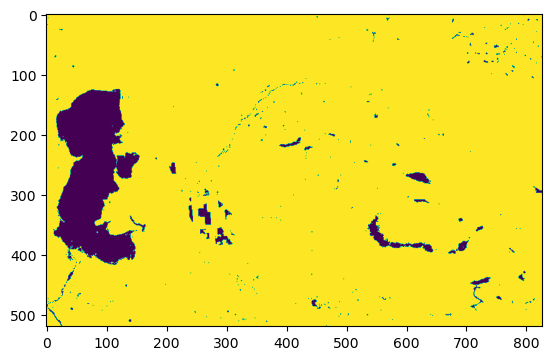

In [5]:
plt.imshow(l1)

In [4]:
plt.imshow(mm1)

NameError: name 'mm1' is not defined

In [39]:
a = mk1[mm1>0]
a.shape

(10252,)